In [14]:
import pyrosm
import matplotlib.pylab as plt
import numpy
from geopandas import GeoDataFrame

print(numpy.__version__)
plt.figure(figsize=(15,15))


1.23.5


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [15]:
osm = pyrosm.OSM("./bandung.osm.pbf")

drive_net : GeoDataFrame = osm.get_network(network_type='driving')

<AxesSubplot: >

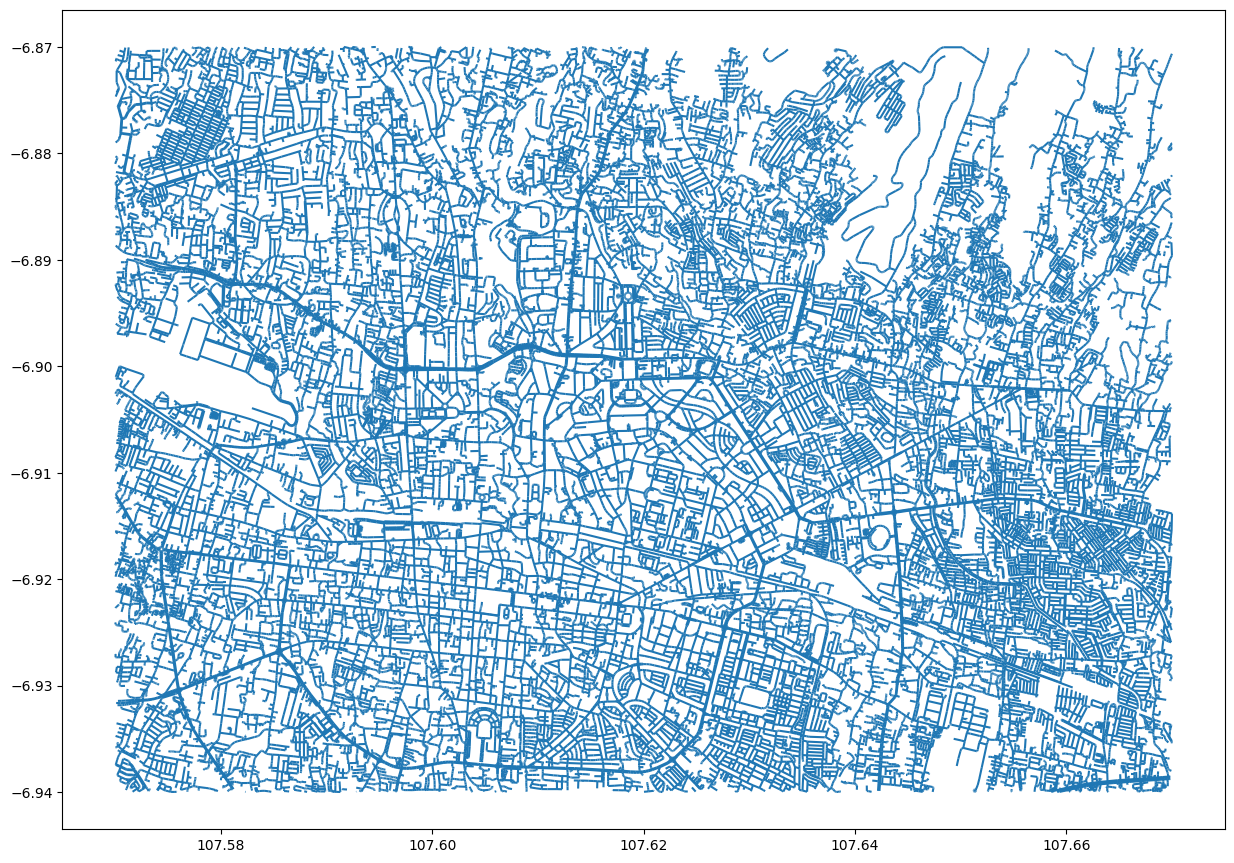

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

drive_net.plot(ax=ax)

In [17]:
nodes, edges = osm.get_network(network_type='driving', nodes=True)
print(len(nodes))
print(len(edges))

90584
97259


In [18]:
edges.columns

Index(['access', 'area', 'bicycle', 'bridge', 'cycleway', 'est_width', 'foot',
       'highway', 'junction', 'lanes', 'lit', 'maxspeed', 'motorcar',
       'motor_vehicle', 'name', 'oneway', 'ref', 'service', 'sidewalk',
       'smoothness', 'surface', 'tunnel', 'width', 'id', 'timestamp',
       'version', 'tags', 'osm_type', 'geometry', 'u', 'v', 'length'],
      dtype='object')

In [19]:
edges[['u', 'v', 'name', 'length']].head()

,u,v,name,length
0,5358055095,10157418987,Jalan Merdeka,231.647
1,10157418987,9762989936,Jalan Merdeka,67.646
2,9762989936,25433364,Jalan Merdeka,14.992
3,3376669069,5334388824,Jalan Cicendo,35.839
4,5334388824,5334388825,Jalan Cicendo,46.692


In [20]:
nodes.columns

Index(['lon', 'lat', 'tags', 'timestamp', 'version', 'changeset', 'id',
       'geometry'],
      dtype='object')

In [21]:
nodes.head()

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,107.610627,-6.906970,None,1667579032,5,0,5358055095,POINT (107.61063 -6.90697)
1,107.610652,-6.909053,None,1667579032,1,0,10157418987,POINT (107.61065 -6.90905)
2,107.610660,-6.909662,"{'crossing': 'zebra', 'highway': 'crossing', '...",1667579032,3,0,9762989936,POINT (107.61066 -6.90966)
3,107.610663,-6.909796,None,1667579032,10,0,25433364,POINT (107.61066 -6.90980)
4,107.604466,-6.907216,"{'bus': 'yes', 'highway': 'bus_stop', 'name': ...",1653562083,7,0,3376669069,POINT (107.60447 -6.90722)


In [25]:
print(type(nodes))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [26]:
import json

data = {
    "nodes": [[node['id'], node['lat'], node['lon']] for _,node in nodes.iterrows()],
    "edges": [[edge['u'], edge['v'], edge['length']] for _,edge in edges.iterrows()]
}

with open("bandung.json", 'w') as w:
    json.dump(data, w)